**Import Library**

In this section, we import all the necessary libraries for our project. This includes TensorFlow and Keras for building and training our model, as well as libraries for data preprocessing and visualization. We also reset the TensorFlow session to ensure a clean state before starting the training process.

In [30]:
# All necessary imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import zipfile

# Reset the TensorFlow session
tf.keras.backend.clear_session()

**Setting Up Directories for Training and Validation Datasets**

We define the directories for our training and validation datasets. These directories contain the images of rock, paper, and scissors that will be used to train and validate our model.

In [31]:
# Define directories for training and validation datasets
base_dir = '/content/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

**Data Generators for Training and Validation**

In this section, we set up data generators for both the training and validation datasets. These generators will load images from the respective directories, resize them to 150x150 pixels, and rescale the pixel values to be between 0 and 1. This helps in normalizing the data before feeding it to the neural network.

In [32]:
# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Defining the Model Architecture**

We define the architecture of our convolutional neural network (CNN). The model consists of several convolutional layers followed by max pooling layers to down-sample the feature maps. After the convolutional layers, we flatten the feature maps and pass them through fully connected (dense) layers. The final layer has 3 neurons with a softmax activation function to classify the images into three categories: rock, paper, and scissors.

In [33]:
# Model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

**Compiling the Model**

We compile the model. We use the Adam optimizer and categorical cross-entropy loss function since we have more than two categories. We also specify accuracy as the metric to monitor during training.

In [34]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**Setting Up Callbacks**

We set up two callbacks: EarlyStopping and ModelCheckpoint. EarlyStopping will stop the training if the validation loss does not improve for 5 consecutive epochs, preventing overfitting. ModelCheckpoint will save the best model based on validation accuracy.

In [35]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)
]

**Training the Model**

We train the model using the training data generator. We specify the number of epochs and use the validation data generator to validate the model after each epoch. The callbacks are also used during training to monitor performance and save the best model.

In [36]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
66/66 [==============================] - 12s 135ms/step - loss: 0.5706 - accuracy: 0.7439 - val_loss: 0.2039 - val_accuracy: 0.9281
Epoch 2/30
66/66 [==============================] - 6s 93ms/step - loss: 0.1507 - accuracy: 0.9527 - val_loss: 0.1406 - val_accuracy: 0.9555
Epoch 3/30
66/66 [==============================] - 7s 105ms/step - loss: 0.1213 - accuracy: 0.9604 - val_loss: 0.1509 - val_accuracy: 0.9521
Epoch 4/30
66/66 [==============================] - 7s 112ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.1202 - val_accuracy: 0.9726
Epoch 5/30
66/66 [==============================] - 6s 97ms/step - loss: 0.0378 - accuracy: 0.9855 - val_loss: 0.1248 - val_accuracy: 0.9680
Epoch 6/30
66/66 [==============================] - 7s 108ms/step - loss: 0.0453 - accuracy: 0.9832 - val_loss: 0.0961 - val_accuracy: 0.9783
Epoch 7/30
66/66 [==============================] - 7s 108ms/step - loss: 0.0296 - accuracy: 0.9924 - val_loss: 0.3721 - val_accuracy: 0.8984
Epoch 8

**Loading the Best Model and Verifying Accuracy**

Here we load the best model weights saved by ModelCheckpoint. We then verify that the training and validation accuracy are above 85% for the second epoch to meet the required performance criteria.

In [37]:
# Load the best model
model.load_weights('best_model.h5')

# Verify training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

assert train_acc[2] >= 0.85, "Training accuracy is less than 85%"
assert val_acc[2] >= 0.85, "Validation accuracy is less than 85%"

**Predicting and Displaying an Image**

In this final section, we predict and display an image from the validation set. We load an image, preprocess it, and use the trained model to predict its class. The predicted class is then displayed along with the image.

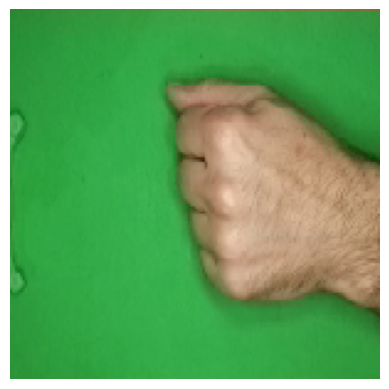

1/1 [==============================] - 0s 78ms/step
The image is predicted to be: rock


In [38]:
validation_rock_dir = os.path.join(validation_dir, 'rock')
uploaded_image_path = os.path.join(validation_rock_dir, '8pxbBnbfqzX3ijVM.png')

if os.path.isfile(uploaded_image_path):
    img = image.load_img(uploaded_image_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    predicted_class = np.argmax(classes[0])
    class_labels = train_generator.class_indices
    class_labels = {v: k for k, v in class_labels.items()}
    print(f"The image is predicted to be: {class_labels[predicted_class]}")
else:
    print(f"File not found: {uploaded_image_path}")